# AAE 718 Project 3

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(r"C:\AAE 718\Data Files\Project3 Data.csv")

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Drop rows with missing precipitation
df_clean = df.dropna(subset=['PRCP'])

# Confirm cleaning
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_clean)}")


Original rows: 17460
Cleaned rows: 17340


In [3]:
# Add year and month columns
df_clean['YEAR'] = df_clean['DATE'].dt.year
df_clean['MONTH'] = df_clean['DATE'].dt.month

# Define meteorological seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df_clean['SEASON'] = df_clean['MONTH'].apply(get_season)

# Aggregate monthly rainfall totals
monthly_totals = df_clean.groupby(['STATION', 'NAME', 'YEAR', 'MONTH'])['PRCP'].sum().reset_index()

# Aggregate seasonal rainfall totals
seasonal_totals = df_clean.groupby(['STATION', 'NAME', 'YEAR', 'SEASON'])['PRCP'].sum().reset_index()

# Preview
print("Monthly Totals:")
print(monthly_totals.head())

print("\nSeasonal Totals:")
print(seasonal_totals.head())

# Safely create a copy to avoid the SettingWithCopyWarning
df_clean = df.dropna(subset=['PRCP']).copy()

# Now add time columns safely
df_clean['DATE'] = pd.to_datetime(df_clean['DATE'])
df_clean['YEAR'] = df_clean['DATE'].dt.year
df_clean['MONTH'] = df_clean['DATE'].dt.month
df_clean['SEASON'] = df_clean['MONTH'].apply(get_season)



Monthly Totals:
       STATION                  NAME  YEAR  MONTH  PRCP
0  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010      1   0.0
1  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010      2   0.0
2  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010      3   0.8
3  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010      4   3.8
4  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010      5   3.6

Seasonal Totals:
       STATION                  NAME  YEAR  SEASON   PRCP
0  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010    Fall   7.16
1  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010  Spring   8.20
2  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010  Summer  24.22
3  US1WIWK0016  MUSKEGO 1.0 W, WI US  2010  Winter   1.34
4  US1WIWK0016  MUSKEGO 1.0 W, WI US  2011    Fall   8.70


C:\Users\madel\AppData\Local\Temp\ipykernel_4108\335309160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YEAR'] = df_clean['DATE'].dt.year
C:\Users\madel\AppData\Local\Temp\ipykernel_4108\335309160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MONTH'] = df_clean['DATE'].dt.month
C:\Users\madel\AppData\Local\Temp\ipykernel_4108\335309160.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

## Plotting seasonal rainfall over time in Muskego

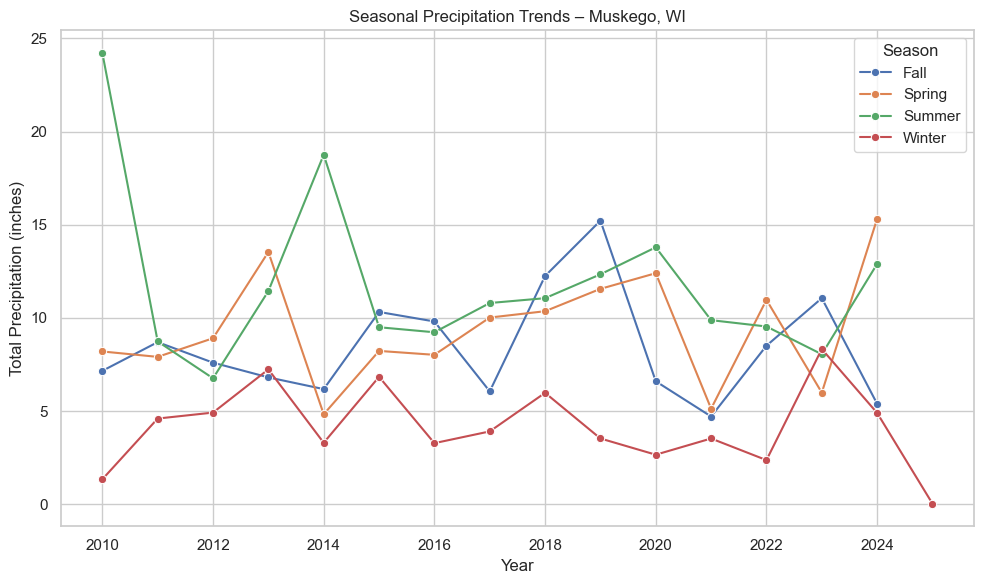

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for Muskego
muskego = seasonal_totals[seasonal_totals['NAME'].str.contains("MUSKEGO")]

# Set seaborn style
sns.set(style="whitegrid")

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=muskego, x='YEAR', y='PRCP', hue='SEASON', marker='o')

# Customize
plt.title("Seasonal Precipitation Trends – Muskego, WI")
plt.xlabel("Year")
plt.ylabel("Total Precipitation (inches)")
plt.legend(title='Season')
plt.tight_layout()

# Save the plot

plt.show()


## Seasonal Rainfall overtime for Waukesha County

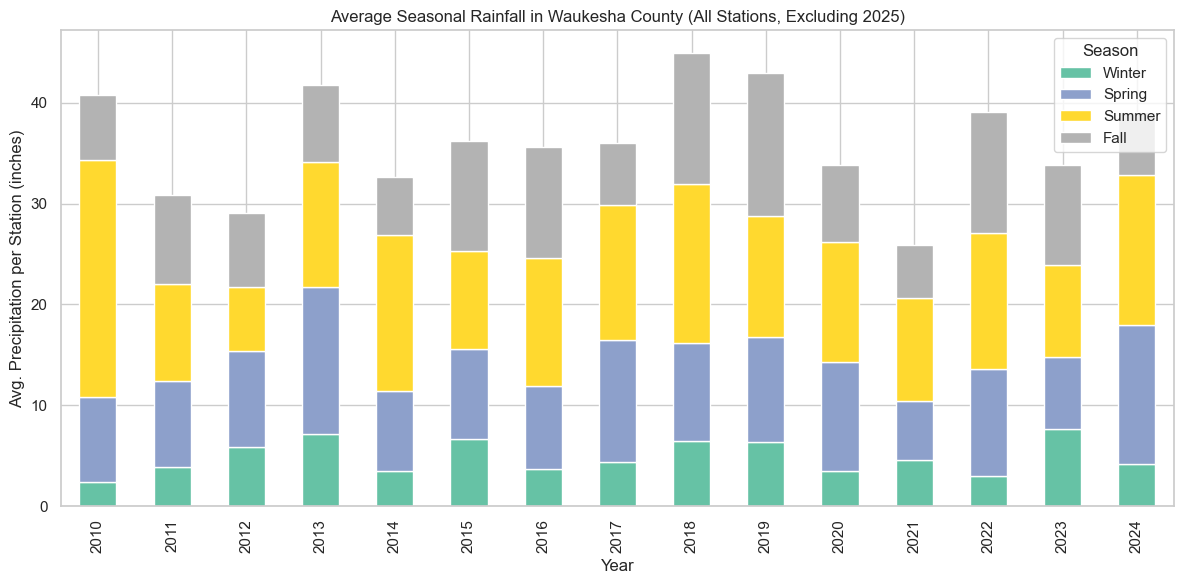

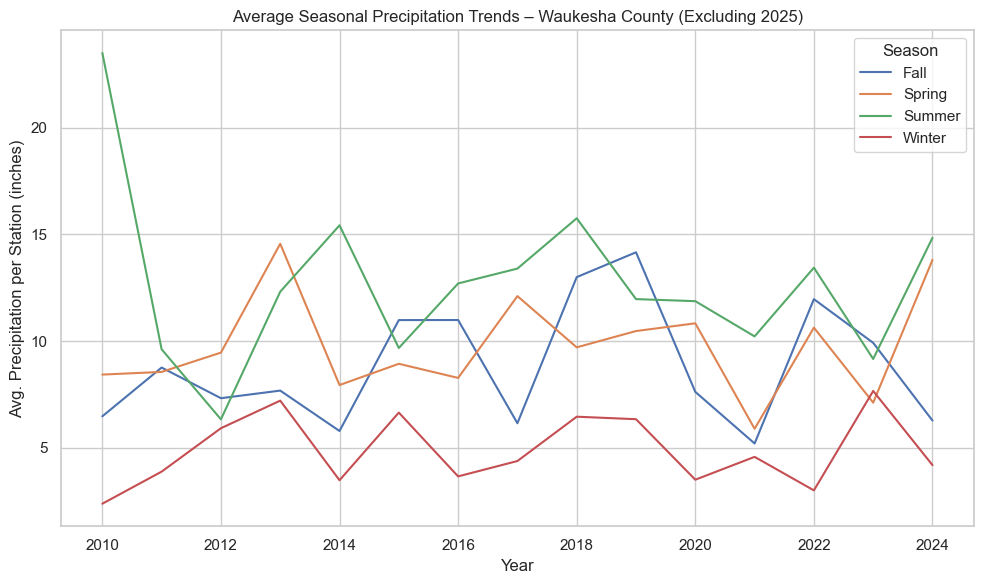

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load and clean data
df = pd.read_csv(r"C:\AAE 718\Data Files\Project3 Data.csv")
df = df.dropna(subset=['PRCP']).copy()
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['SEASON'] = df['MONTH'].apply(get_season)

# Aggregate seasonal totals per station
seasonal_totals = df.groupby(['STATION', 'NAME', 'YEAR', 'SEASON'])['PRCP'].sum().reset_index()

# Average across all stations per season/year
county_seasonal_avg = seasonal_totals.groupby(['YEAR', 'SEASON'])['PRCP'].mean().reset_index()

# Filter out year 2025 and later
county_seasonal_avg = county_seasonal_avg[county_seasonal_avg['YEAR'] < 2025]

# Make sure output folder exists
os.makedirs("images", exist_ok=True)

# Pivot table for stacked bar chart
pivot_table_avg = county_seasonal_avg.pivot(index='YEAR', columns='SEASON', values='PRCP').fillna(0)
pivot_table_avg = pivot_table_avg[['Winter', 'Spring', 'Summer', 'Fall']]  # Order seasons

# --- Chart 1: Stacked Bar Chart ---
pivot_table_avg.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Average Seasonal Rainfall in Waukesha County (All Stations, Excluding 2025)")
plt.xlabel("Year")
plt.ylabel("Avg. Precipitation per Station (inches)")
plt.legend(title="Season")
plt.tight_layout()

plt.show()

# --- Chart 2: Line Graph ---
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=county_seasonal_avg, x='YEAR', y='PRCP', hue='SEASON')
plt.title("Average Seasonal Precipitation Trends – Waukesha County (Excluding 2025)")
plt.xlabel("Year")
plt.ylabel("Avg. Precipitation per Station (inches)")
plt.legend(title='Season')
plt.tight_layout()

plt.show()


### Aggregating monthly averages

In [15]:
# Aggregate monthly rainfall per station
monthly_totals = df.groupby(['STATION', 'NAME', 'YEAR', 'MONTH'])['PRCP'].sum().reset_index()

# Get average monthly rainfall across all stations
monthly_avg = monthly_totals.groupby(['YEAR', 'MONTH'])['PRCP'].mean().reset_index()

# Filter out 2025 just in case
monthly_avg = monthly_avg[monthly_avg['YEAR'] < 2025]


# Find the month with highest average rainfall each year
peak_months = monthly_avg.loc[monthly_avg.groupby('YEAR')['PRCP'].idxmax()].reset_index(drop=True)

print(peak_months)

    YEAR  MONTH       PRCP
0   2010      7  11.815000
1   2011      6   5.245000
2   2012     10   4.670000
3   2013      6   7.013333
4   2014      6   6.593333
5   2015      4   5.100000
6   2016      6   5.033333
7   2017      6   5.790000
8   2018      8   7.363333
9   2019      9   6.236667
10  2020      7   6.105000
11  2021      8   4.695000
12  2022      9   6.930000
13  2023      9   4.680000
14  2024      6   7.842000


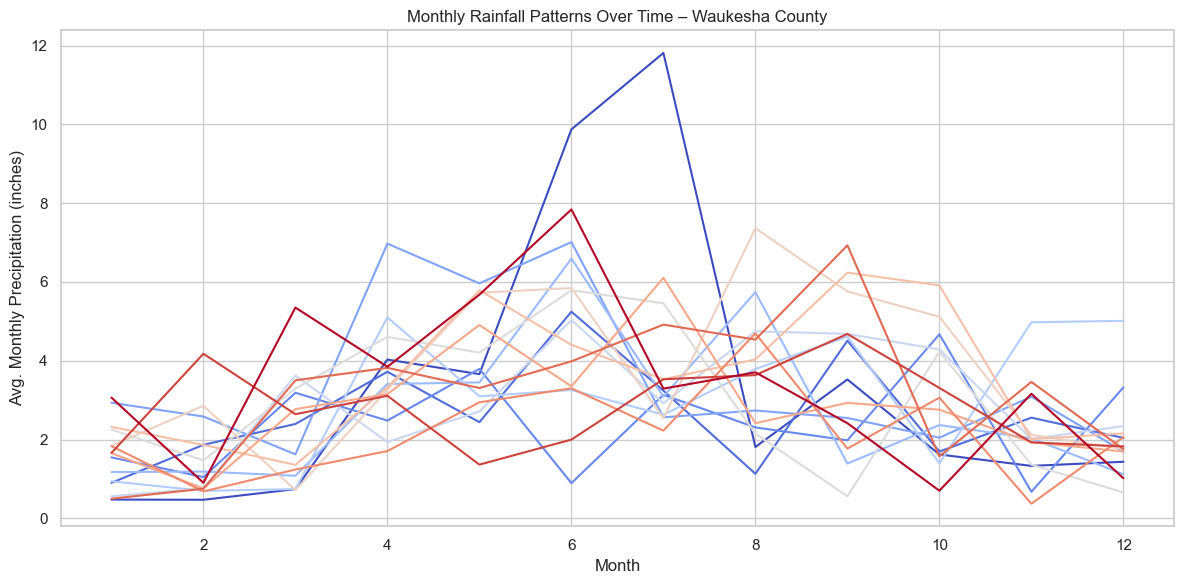

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='MONTH', y='PRCP', hue='YEAR', palette='coolwarm', legend=False)
plt.title("Monthly Rainfall Patterns Over Time – Waukesha County")
plt.xlabel("Month")
plt.ylabel("Avg. Monthly Precipitation (inches)")
plt.tight_layout()

plt.show()


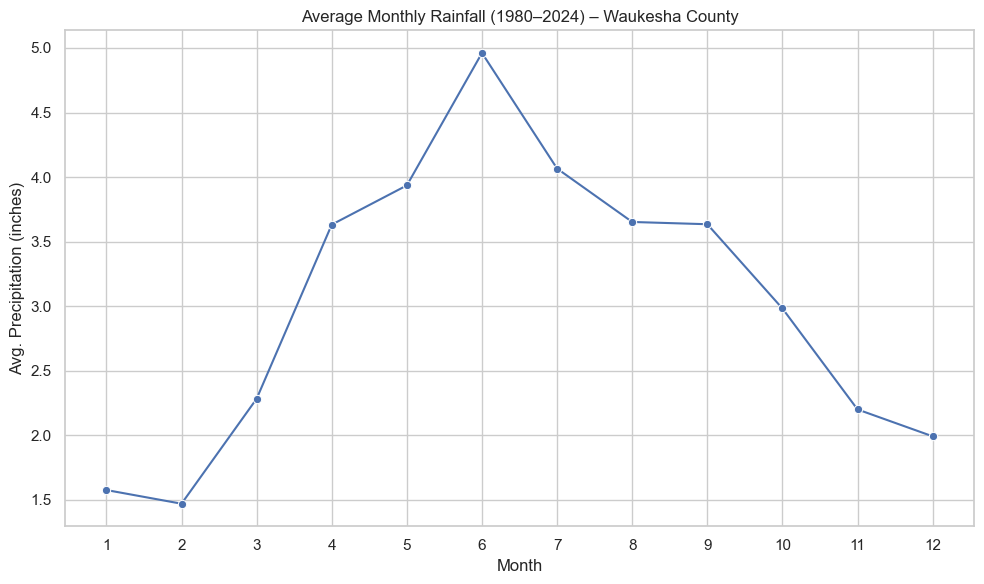

In [23]:
# Compute long-term average rainfall per month

# When is the rainy season typically? (e.g., June is usually the wettest)

monthly_mean = monthly_avg.groupby('MONTH')['PRCP'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_mean, x='MONTH', y='PRCP', marker='o')
plt.title("Average Monthly Rainfall (1980–2024) – Waukesha County")
plt.xlabel("Month")
plt.ylabel("Avg. Precipitation (inches)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()

plt.show()


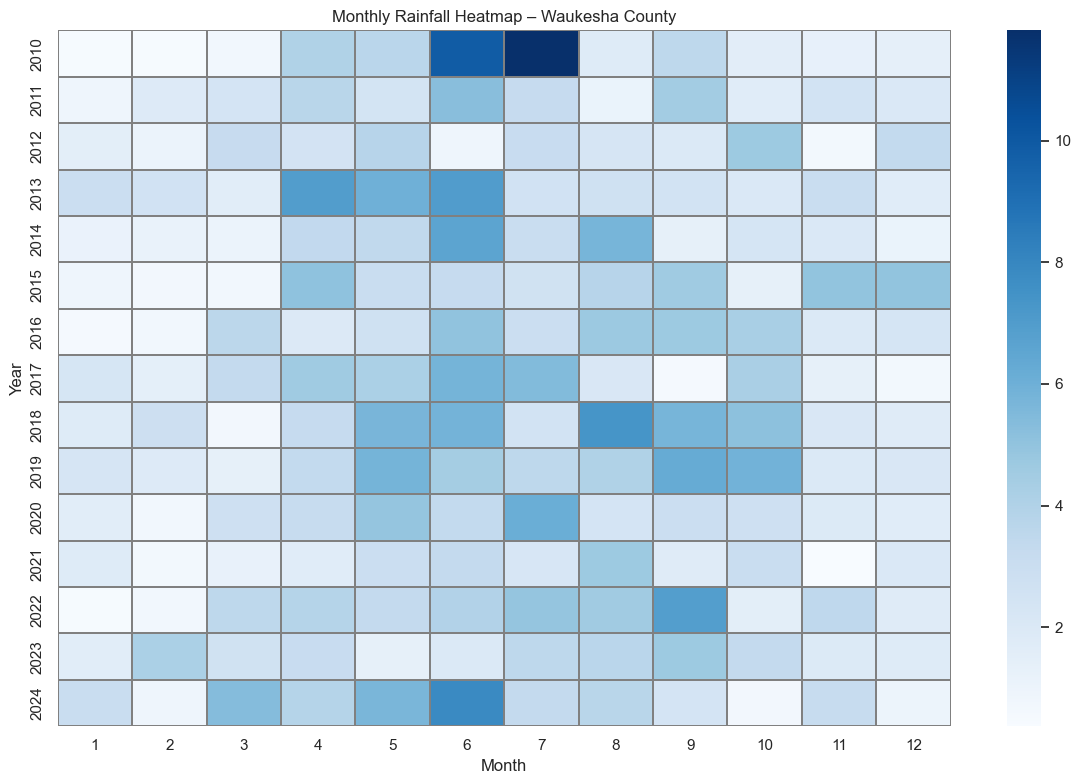

In [22]:
# Pivot for heatmap

# Are rainy months shifting over time? Visually highlights wetter/drier years.


heatmap_data = monthly_avg.pivot(index='YEAR', columns='MONTH', values='PRCP')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.1, linecolor='gray')
plt.title("Monthly Rainfall Heatmap – Waukesha County")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()

plt.show()


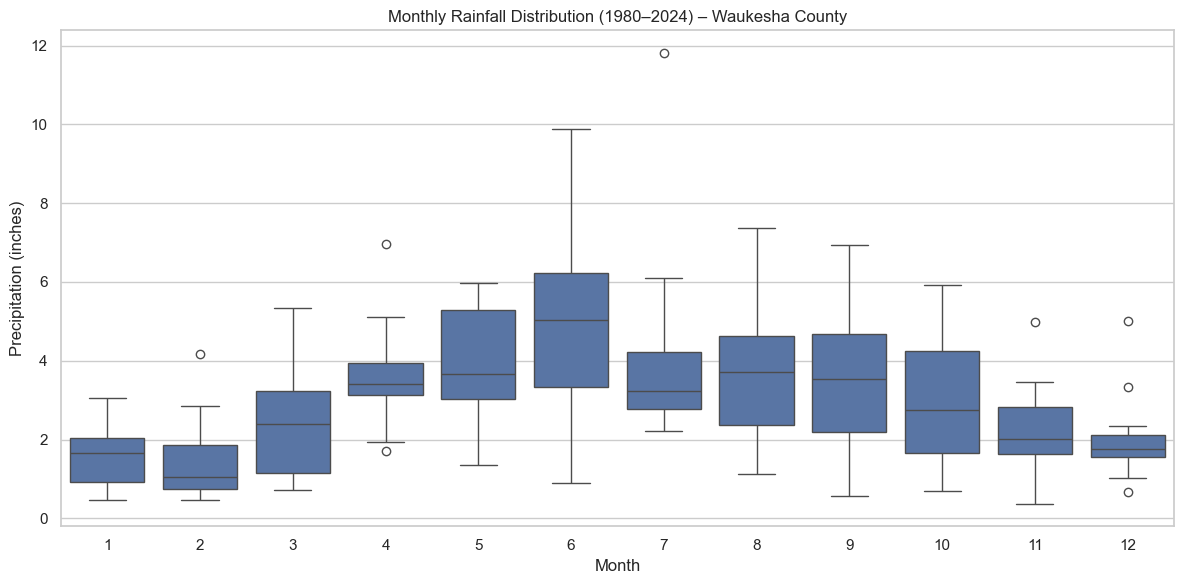

In [ ]:
# Which months have the most variability in rainfall?

plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_avg, x='MONTH', y='PRCP')
plt.title("Monthly Rainfall Distribution (1980–2024) – Waukesha County")
plt.xlabel("Month")
plt.ylabel("Precipitation (inches)")
plt.tight_layout()

plt.show()


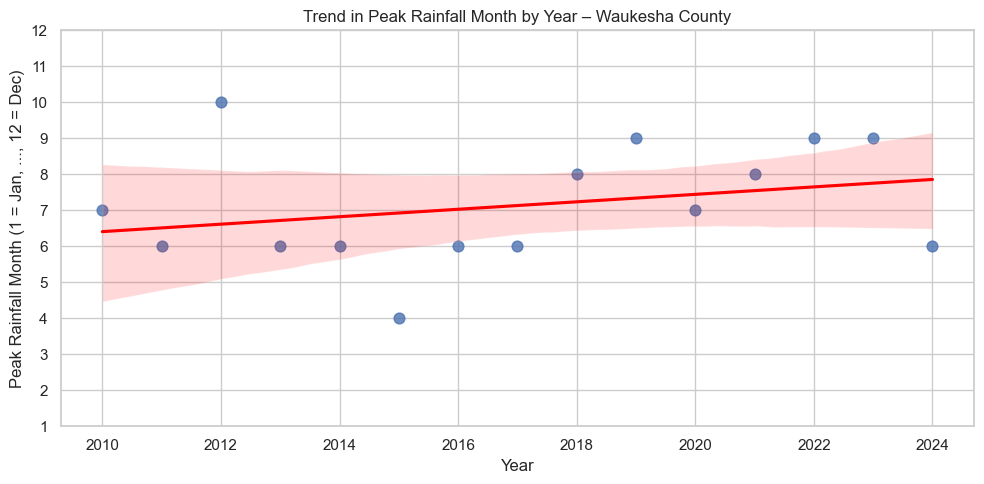

In [19]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Scatter plot with linear regression line
sns.regplot(data=peak_months, x='YEAR', y='MONTH', scatter_kws={'s': 60}, line_kws={'color': 'red'})

# Customize
plt.title("Trend in Peak Rainfall Month by Year – Waukesha County")
plt.xlabel("Year")
plt.ylabel("Peak Rainfall Month (1 = Jan, ..., 12 = Dec)")
plt.yticks(range(1, 13))
plt.grid(True)
plt.tight_layout()

plt.show()


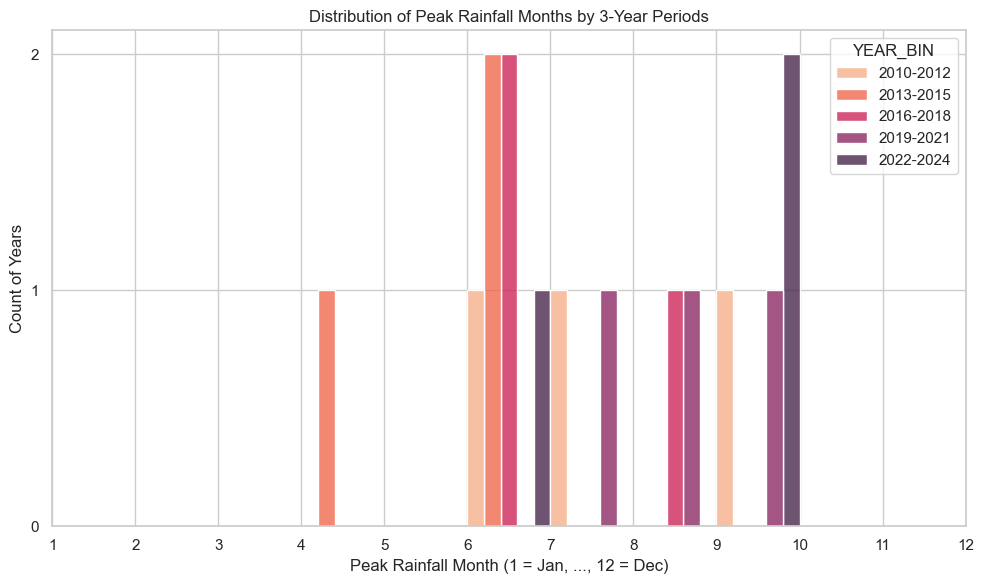

In [51]:
# Create 3-year bins
peak_months['YEAR_BIN'] = pd.cut(
    peak_months['YEAR'],
    bins=range(peak_months['YEAR'].min(), peak_months['YEAR'].max() + 3, 3),
    right=False,
    labels=[f"{y}-{y+2}" for y in range(peak_months['YEAR'].min(), peak_months['YEAR'].max(), 3)]
)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=peak_months, x='MONTH', hue='YEAR_BIN', multiple='dodge', binwidth=1, palette='rocket_r')
plt.title("Distribution of Peak Rainfall Months by 3-Year Periods")
plt.xlabel("Peak Rainfall Month (1 = Jan, ..., 12 = Dec)")
plt.ylabel("Count of Years")
plt.xticks(range(1, 13))
plt.yticks(range(0,3))
plt.tight_layout()

plt.show()


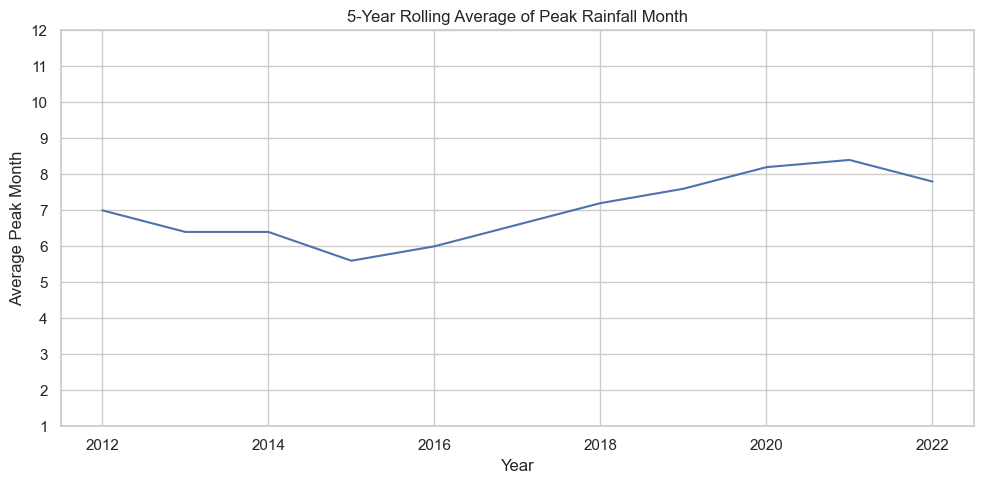

In [ ]:
# Sort by year and compute rolling average of peak month (window = 5 years)
# peak_months_sorted = peak_months.sort_values('YEAR')
# peak_months_sorted['ROLLING_PEAK'] = peak_months_sorted['MONTH'].rolling(window=5, center=True).mean()

# plt.figure(figsize=(10, 5))
# sns.lineplot(data=peak_months_sorted, x='YEAR', y='ROLLING_PEAK')
# plt.title("5-Year Rolling Average of Peak Rainfall Month")
# plt.xlabel("Year")
# plt.ylabel("Average Peak Month")
# plt.yticks(range(1, 13))
# plt.grid(True)
# plt.tight_layout()

# plt.show()
